# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

Primero planeo leer los dataframes, revisar si tiene valores duplicados, ausentes, en su caso eliminarlos, ver cuantas filas, que tipo de datos con el método info, imprimir 5 filas aleatorias con sample(). Con ello, estoy limpiando los datos.

## Inicialización

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind
from scipy.stats import levene
import numpy as np
import seaborn as sns

## Cargar datos

In [2]:
calls = pd.read_csv(r'E:\análisis de datos\datasets\megaline_calls.csv')
internet = pd.read_csv(r'E:\análisis de datos\datasets\megaline_internet.csv')
messages = pd.read_csv(r'E:\análisis de datos\datasets\messages.csv')
plans = pd.read_csv(r'E:\análisis de datos\datasets\megaline_tariffs.csv')
users = pd.read_csv(r'E:\análisis de datos\datasets\megaline_users1.csv')

# Preparar los datos

## Exploración General

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]


### Información General

In [3]:
def quick_info(dataframe):
    """Esta función indaga la información con método info de cada dataframe."""
    for nombre, df in dataframe.items():
        print(f'Información general del dataframe \033[4m\033[1m{nombre}\033[0m\033[0m')
        df.info()
        print('-'*60)

dataframes = {"calls":calls,"internet":internet,"plans":plans,"messages":messages,"users":users}
quick_info(dataframes)

Información general del dataframe calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
------------------------------------------------------------
Información general del dataframe internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
--

### Primeras filas

In [4]:
def quick_sample(dataframe):
    """Esta función imprime las primeras 5 filas de cada dataframe con el uso de método head."""
    for nombre, df in dataframe.items():
        print(f'Impresión de las primeras 5 filas del dataframe \033[4m\033[1m{nombre}\033[0m\033[0m')
        print(df.head())
        print('-'*60)

quick_sample(dataframes)    

Impresión de las primeras 5 filas del dataframe calls
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
------------------------------------------------------------
Impresión de las primeras 5 filas del dataframe internet
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
------------------------------------------------------------
Impresión de las primeras 5 filas del dataframe plans
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

 

### Ausentes

In [5]:
def ausentes(dataframe):
    """Esta función indaga los valores ausentes de cada dataframe"""
    for nombre, df in dataframe.items():
        print(f'Suma de valores ausentes del dataframe \033[4m\033[1m{nombre}\033[0m\033[0m')
        print(df.isna().sum())
        print('-'*60)

ausentes(dataframes)        

Suma de valores ausentes del dataframe calls
id           0
user_id      0
call_date    0
duration     0
dtype: int64
------------------------------------------------------------
Suma de valores ausentes del dataframe internet
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
------------------------------------------------------------
Suma de valores ausentes del dataframe plans
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
tariff_name              0
dtype: int64
------------------------------------------------------------
Suma de valores ausentes del dataframe messages
id              0
message_date    0
user_id         0
dtype: int64
------------------------------------------------------------
Suma de valores ausentes del dataframe users
user_id         0
first_name      0
last_name       0
age             0

**Comentario del análisis**

El único dataframe que presenta valores ausentes es users. Esto en la columna churn_date.

Esta columna es la que contiene la fecha de abandono de los usuarios, los valores encontrados como ausentes representan el uso del plan cuando se capturó los datos, por lo que no hay fecha de abandono.

### Duplicados

In [6]:
def duplicados(dataframe):
    """Esta función suma los valores duplicados explicitos"""
    for nombre,df in dataframe.items():
        print(f'El dataframe \033[4m\033[1m{nombre}\033[0m\033[0m contiene {df.duplicated().sum()} filas completamente duplicadas')
        print('-'*60)

duplicados(dataframes)

El dataframe calls contiene 0 filas completamente duplicadas
------------------------------------------------------------
El dataframe internet contiene 0 filas completamente duplicadas
------------------------------------------------------------
El dataframe plans contiene 0 filas completamente duplicadas
------------------------------------------------------------
El dataframe messages contiene 0 filas completamente duplicadas
------------------------------------------------------------
El dataframe users contiene 0 filas completamente duplicadas
------------------------------------------------------------


## plans

Las filas corresponden a los 2 planes, por lo que la fila con el índice 0 representa al plan "surf" y el plan con el índice 1 al "ultimate".  El df cuenta con 8 columnas donde cada columna corresponde con una característica del plan, tal como sus mensajes, megabytes, minutos incluidos, así como los costos al mes y por exceder.

No veo datos duplicados, ausentes (eso es fácil hacerlo solo por inspección, por el total de datos) y no necesitan modificaciones, pues los tipos de datos también son congruentes, solo opté por cambiar el nombre de la columna tariff_name, para facilitar el uso de las columnas posteriormente


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Enriquecer los datos

Agrega factores adicionales a los datos si crees que pudieran ser útiles

In [7]:
plans.rename(columns={'tariff_name':'tariff'},inplace=True)

In [8]:
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024

In [9]:
plans.head(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## users

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Encontramos la columna churn_date con valores ausentes.
Además se necesita cambiar el tipo de dato str de la columna reg_date a datetime

### Enriquecer los datos

In [10]:
print(f'Total de valores ausentes antes de su relleno {users['churn_date'].isna().sum()}')
print('-'*20)
users.fillna({'churn_date':'in_use'},inplace=True)
print(f'Total de valores ausentes después de su relleno {users['churn_date'].isna().sum()}')

Total de valores ausentes antes de su relleno 466
--------------------
Total de valores ausentes después de su relleno 0


In [11]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   tariff      500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## calls

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Para este dataset, identifico un tipo de dato inadecuado para la columna call_date, por lo que se procede a corregir el tipo de dato a datetime.
Además, identifico que la duración de las llamadas están en decimales, por lo que se acercan al valor superior próximo.

Es conveniente agregar una columna que indique el mes.

### Enriquecer los datos

In [13]:
calls.head(1)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52


In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [15]:
calls['month'] = calls['call_date'].dt.month

In [16]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype(int)

In [17]:
calls.head(1)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12


In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 4.7+ MB


## messages

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Caso similar al df de llamadas, la columna de message_date parece ser una fecha, por lo que conviene convertir esta columna de object a datetime con el método to_datetime y format. Además de crear una columna que indique el mes.

### Enriquecer los datos

In [19]:
messages.head(1)

,id,message_date,user_id
0,1000_0,2018-06-27,1000


In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [21]:
messages['month'] = messages['message_date'].dt.month

## internet

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Observo datos duplicados pero observo que son las llamadas que hace el mismo usuario, por lo que esta repetición de user_id no representa un problema. Observo que la fecha es tipo de dato str, por lo que la corrección corresponde a modificar a tipo datetime.

Conviene tener los mb en gb, por lo que se procede a crear una nueva columna con esta conversión de dato.

### Enriquecer los datos

In [22]:
internet.head(1)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86


In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [24]:
internet['month'] = internet['session_date'].dt.month

In [25]:
internet['gb_used'] = internet['mb_used']/1024

In [26]:
internet.head(1)

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754


In [27]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
 5   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 4.4+ MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [28]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


# Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [29]:
monthly_calls = calls.groupby(['user_id','month']).agg(
    total_duration = ('duration','sum'),
    total_calls = ('id','count')
).reset_index()
monthly_calls.head()

,user_id,month,total_duration,total_calls
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64


In [30]:
sms_per_user = messages.groupby(['user_id','month']).agg(
    total_messages = ('id','count')
).reset_index()
sms_per_user.head(1)

,user_id,month,total_messages
0,1000,5,22


In [31]:
internet_per_user = internet.groupby(['user_id','month'])['gb_used'].sum().reset_index()
internet_per_user['gb_used'] = np.ceil(internet_per_user['gb_used'])
internet_per_user['gb_used'] = internet_per_user['gb_used'].astype(int)
internet_per_user.head(1)

,user_id,month,gb_used
0,1000,12,2


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [32]:
total_info = monthly_calls.merge(sms_per_user,how='outer',on=['user_id','month'])
total_info = total_info.merge(internet_per_user,how='outer',on=['user_id','month'])
total_info.head(1)

,user_id,month,total_duration,total_calls,total_messages,gb_used
0,1000,5,NaN,NaN,22.0,NaN


In [33]:
total_info = total_info.fillna(0)
total_info.head(1)

,user_id,month,total_duration,total_calls,total_messages,gb_used
0,1000,5,0.0,0.0,22.0,0.0


In [34]:
user_info = users.merge(plans, on='tariff')
total_info = total_info.merge(user_info, on='user_id', how='left')
total_info.head(1)

,user_id,month,total_duration,total_calls,total_messages,gb_used,first_name,last_name,age,city,...,tariff,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,5,0.0,0.0,22.0,0.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,in_use,1000,30720,3000,70,7,0.01,0.01,30.0


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
#Ingreso por minutos extras
total_info['usd_extra_minutes'] = (total_info['total_duration']-total_info['minutes_included'])*total_info['usd_per_minute']
total_info['usd_extra_minutes'] = total_info['usd_extra_minutes'].apply(lambda x: max(x,0))

#Ingreso por mensajes extras
total_info['usd_extra_messages'] = (total_info['total_messages']-total_info['messages_included'])*total_info['usd_per_message']
total_info['usd_extra_messages'] = total_info['usd_extra_messages'].apply(lambda x: max(x,0))

#Ingreso por gigabytes extras 
total_info['usd_extra_gb'] = (total_info['gb_used']-total_info['gb_per_month_included'])*total_info['usd_per_gb']
total_info['usd_extra_gb'] = total_info['usd_extra_gb'].apply(lambda x: max(x,0))

La parte del código: .apply(lambda x: max(x,0)) es utilizada para devolver 0 en caso de que el cliente no haya usado más minutos de los incluidos, esto se debe a que el cliente tiene 3000 minutos, así que cantidades menores a eso darán un numero negativo, lo que representaría un pago inverso empresa-cliente, así que simplemente la función lambda devuelve 0 al obtener un valor negativo.

In [36]:
total_info['total_payment'] = total_info['usd_monthly_pay'] + total_info['usd_extra_minutes'] + total_info['usd_extra_messages'] + total_info['usd_extra_gb']

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
mean_surf_calls_duration = total_info[total_info['tariff']=='surf'].groupby('month')['total_duration'].mean().reset_index()
mean_ultimate_calls_duration = total_info[total_info['tariff']=='ultimate'].groupby('month')['total_duration'].mean().reset_index()

#Nuevo dataframe con las comparaciones de la agrupación
mean_calls_duration = mean_surf_calls_duration.merge(mean_ultimate_calls_duration, on='month')
mean_calls_duration.columns = ['month', 'surf', 'ultimate']

mean_calls_duration.head(12)

,month,surf,ultimate
0,1,14.500000,48.375000
1,2,46.894737,117.583333
2,3,89.294118,98.675676
3,4,135.207692,121.965517
4,5,182.059172,159.202703
5,6,203.087379,193.722222
6,7,232.683761,247.029412
7,8,239.848375,253.576271
8,9,276.151203,289.430769
9,10,326.429487,329.503448


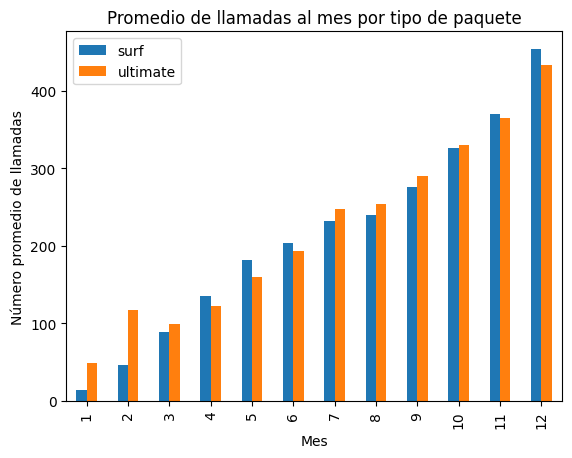

In [38]:
#Graficación
mean_calls_duration.plot(kind='bar', x='month')
plt.title('Promedio de llamadas al mes por tipo de paquete')
plt.xlabel('Mes')
plt.ylabel('Número promedio de llamadas')
plt.show()

Text(0.5, 1.0, 'histograma de la distribución de la duración de llamadas ')

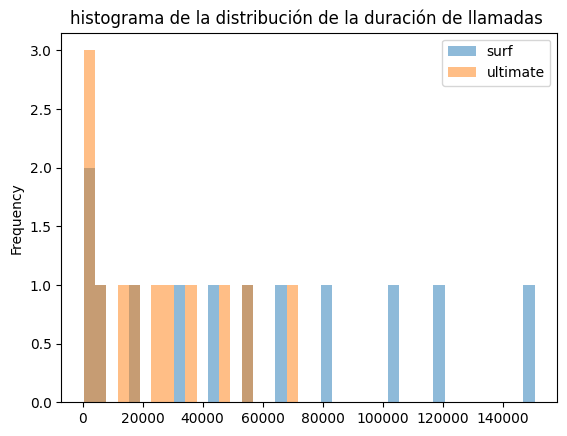

In [56]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
min_surf = total_info[total_info['tariff']=='surf'].groupby('month')['total_duration'].sum().reset_index()
min_ultimate = total_info[total_info['tariff']=='ultimate'].groupby('month')['total_duration'].sum().reset_index()

total_minutes = min_surf.merge(min_ultimate, on='month')
total_minutes.columns = ['month','surf','ultimate']

total_minutes[['surf','ultimate']].plot(kind='hist', alpha= 0.5, bins=40)
plt.title('histograma de la distribución de la duración de llamadas ')

[Calcula la media y la varianza de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

<Axes: >

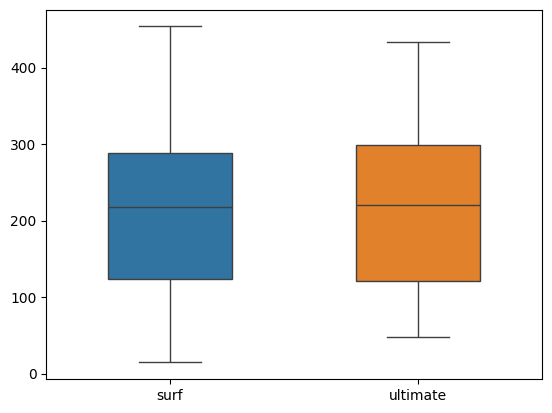

In [65]:
mean_duration_surf = total_info[total_info['tariff']=='surf'].groupby('month')['total_duration'].mean()
variance_surf = np.var(mean_duration_surf)

mean_duration_ultimate = total_info[total_info['tariff']=='ultimate'].groupby('month')['total_duration'].mean()
variance_ultimate = np.var(mean_duration_ultimate)

boxplot = pd.Series(mean_duration_surf,name='surf').to_frame().join(pd.Series(mean_duration_ultimate,name='ultimate'))
sns.boxplot(data=boxplot, width=0.5)

In [67]:
boxplot.describe()

,surf,ultimate
count,12.000000,12.000000
mean,214.147293,221.426129
std,131.403002,118.226469
min,14.500000,48.375000
25%,123.729299,120.869971
50%,217.885570,220.375817
75%,288.720774,299.448939
max,453.855422,433.275000


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


Ambos planes parecen ser bastante similares en cuanto al comportamiento de sus consumidores. El espación intercuartílico o IQR va de 123 a 288 aproximadamente en el plan surf, siendo la mediana el valor correspondiente a 217. Lo que nos indica que es una duración típica del plan surf.
Hablando del plan ultimate, su IQR va desde aproximadamente 120 hasta 299, su mediana o Q2 corresponde a 220, bastante similar. 

En cuanto a valores máximos y minimos, en el plan surf el valor mínimo corresponde a 14 mientras que el del plan ultimate es de 48, ahora en cuanto a valores máximos, para el plan surf corresponde a 453, siendo para el plan ultimate 433 igualmente.
Esto nos deja ver una duración muy similar entre planes.

### Mensajes

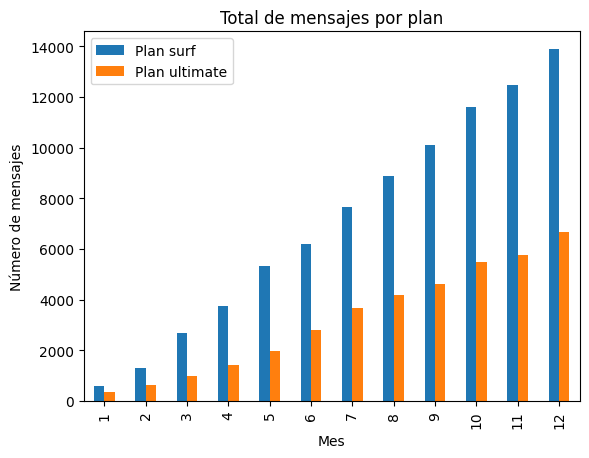

In [79]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
sms_surf = total_info[total_info['tariff']=='surf'].groupby('month')['total_messages'].sum().reset_index()
sms_ultimate = total_info[total_info['tariff']=='ultimate'].groupby('month')['total_messages'].sum().reset_index()

total_messages = sms_surf.merge(sms_ultimate, on='month')
total_messages.columns = ['month', 'surf','ultimate']

total_messages.plot(kind='bar', x='month')
plt.title('Total de mensajes por plan')
plt.xlabel('Mes')
plt.ylabel('Número de mensajes')
plt.legend(['Plan surf','Plan ultimate'])
plt.show()

Text(0.5, 1.0, 'Total de gb utilizados por plan')

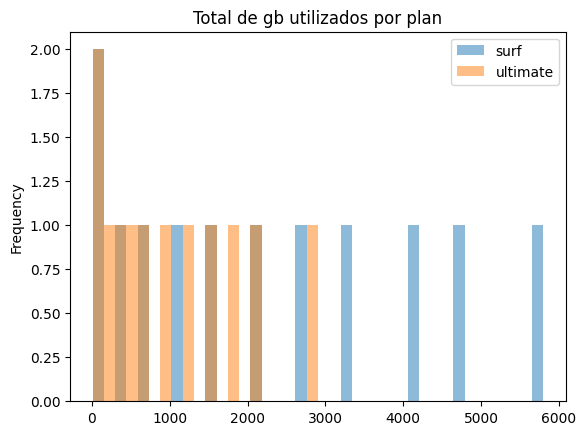

In [92]:
gb_surf = total_info[total_info['tariff']=='surf'].groupby('month')['gb_used'].sum().reset_index()
gb_ultimate = total_info[total_info['tariff']=='ultimate'].groupby('month')['gb_used'].sum().reset_index()

total_gb = gb_surf.merge(gb_ultimate, on='month')
total_gb.columns = ['month', 'surf', 'ultimate']

total_gb[['surf','ultimate']].plot(kind='hist', bins = 40, alpha = 0.5)
plt.title('Total de gb utilizados por plan')

<Axes: >

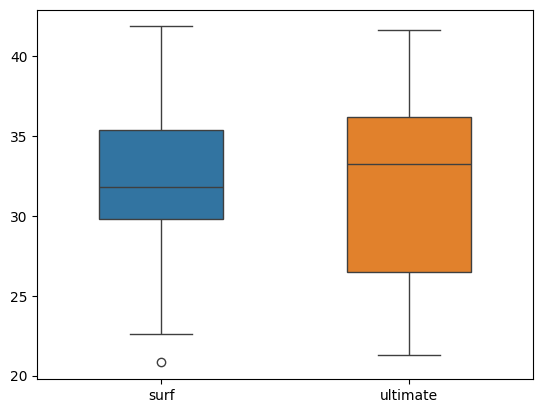

In [90]:
mean_sms_surf = total_info[total_info['tariff']=='surf'].groupby('month')['total_messages'].mean()
variance_sms_surf = np.var(mean_sms_surf)

mean_sms_ultimate = total_info[total_info['tariff']=='ultimate'].groupby('month')['total_messages'].mean()
variance_sms_ultimate = np.var(mean_sms_ultimate)

sms_boxplot = pd.Series(mean_sms_surf,name='surf').to_frame().join(pd.Series(mean_sms_ultimate,name='ultimate'))
sns.boxplot(data=sms_boxplot, width=0.5)

In [91]:
sms_boxplot.describe()

,surf,ultimate
count,12.000000,12.000000
mean,31.885129,31.670390
std,6.054107,6.420525
min,20.821429,21.312500
25%,29.779201,26.456081
50%,31.810544,33.223540
75%,35.407687,36.213567
max,41.858434,41.612500


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Los usuarios tienden a enviar más mensajes los últimos meses del año.
En cuanto al IQR, para el plan surf, va de 29 a 35, siendo la mediana 31 mensajes. Para el plan IQR del plan ultimate, va de 26 a 36, siendo la mediana 33. 
El valor máximo del plan surf corresponde a 41, mientras que el minimo es 20. Por otro lado, el máximo del plan ultimate corresponde a 41 y el mínimo es 21.

### Internet